# HeartFailure Prediction Using Naive Byes


Predict Heart Failure, create a model to assess the likelihood of a death by heart failure event from
scratch.

### Problem Statement
Use the Machine Learning Workflow to process and transform "heart_failure_clinical_records_dataset.csv" to create prediction model.This model predicts which people have likelihood of a death by heart failure with 70% or greater accuracy



### Importing Libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Loading dataset

In [5]:
#reading the csv file
data = pd.read_csv('hf_clinical_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Summarizing the dataset

In [18]:
#describing the dataset
#DESCRIBTIVE STATISTICS OF THE DATASET
print(data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


#### We dont have any null/missing values in the dataset.Since, the data is clean there is no need for pre-processing the data

In [3]:
#understanding the columns in the dataset

info = ["        age",
        "1:Yes, 0:No",
        "creatinine_phos",
        "1: Yes, 0: No",
        "ejection_fraction",
        "1: Yes, 0: No",
        "platelets","serum_creatinine",
        "serum_sodium",
        "        1:male, 0: female", 
        "1:yes,0:no",
        "        time","1:Yes,0:No"]

#print each column
for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			        age
anaemia:			1:Yes, 0:No
creatinine_phosphokinase:			creatinine_phos
diabetes:			1: Yes, 0: No
ejection_fraction:			ejection_fraction
high_blood_pressure:			1: Yes, 0: No
platelets:			platelets
serum_creatinine:			serum_creatinine
serum_sodium:			serum_sodium
sex:			        1:male, 0: female
smoking:			1:yes,0:no
time:			        time
DEATH_EVENT:			1:Yes,0:No


In [4]:
data_shape = data.shape
print("Shape of the dataset:\n\n",data_shape)

Shape of the dataset:

 (299, 13)


### Correlation between the target column and other columns

In [5]:
#correlation
print('\nCORREATION\n')
print(data.corr()["DEATH_EVENT"].abs().sort_values(ascending=False))


CORREATION

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64


#### Diabetes and sex is weakly correlated with the target(DEATH_EVENT) when compared to other columns

In [14]:
#describtion of the target variable
aa= data["DEATH_EVENT"].describe()
print("\nDESCRIPTION OF THE TARGET VARIABLE(DEATH_EVENT):\n\n", aa)


DESCRIPTION OF THE TARGET VARIABLE(DEATH_EVENT):

 count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64


In [15]:
#unique variables in 'DEATH_EVENT'
a = data["DEATH_EVENT"].unique()
print("\nUnique variables in DEATH_EVENT column are:\n\n", a)


Unique variables in DEATH_EVENT column are:

 [1 0]


### Exploratory Data Analysis(EDA)

<ipython-input-6-43dc6429f15f>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


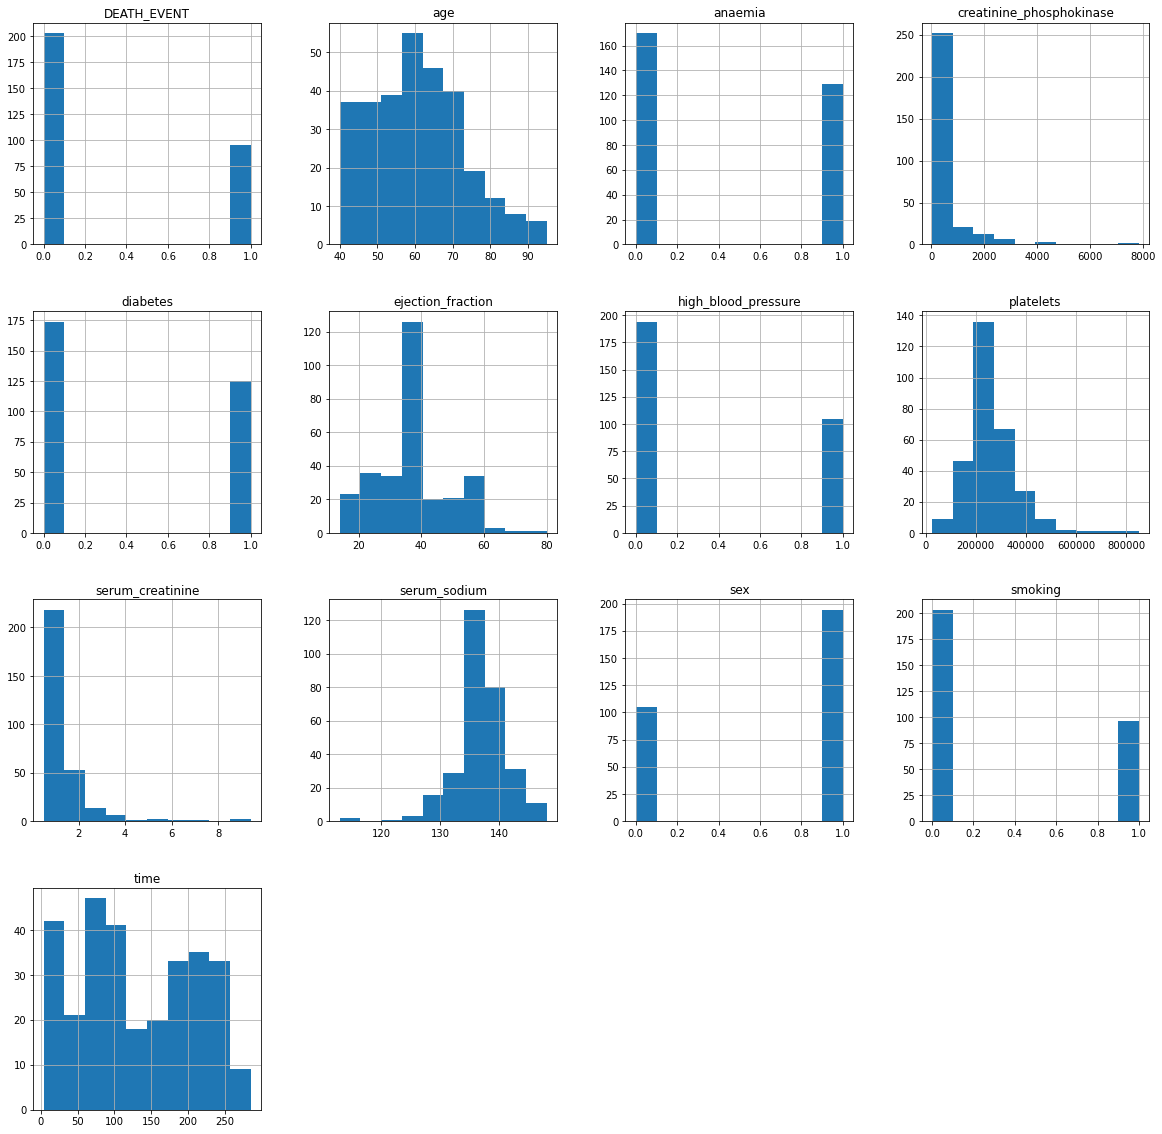

In [6]:
#data distributions

import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

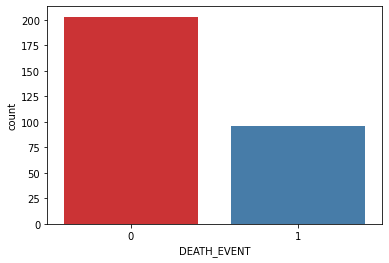


 1 : People who have heart disease 
 0 : People who do not have heart disease

 There are: 
 203 patients -- without heart disease 
 96 patients -- with the disease


In [6]:
#case counts
sns.countplot(x='DEATH_EVENT',data=data, palette= "Set1")
plt.show()
cases = data.DEATH_EVENT.value_counts()
print("\n 1 : People who have heart disease \n 0 : People who do not have heart disease")
print(f"\n There are: \n {cases[0]} patients -- without heart disease \n {cases[1]} patients -- with the disease")

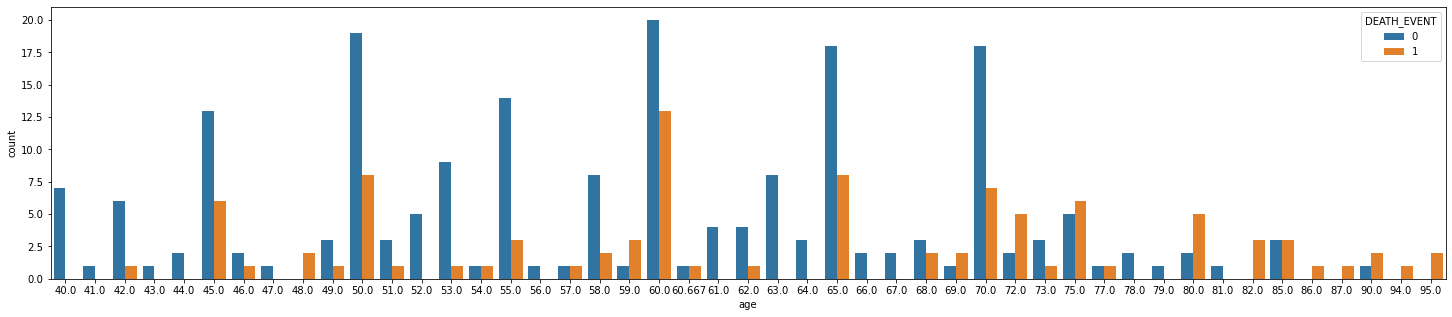

In [22]:
#age and death_event plot
plt.figure(figsize=(25,5))
sns.countplot(x='age',data = data, hue = 'DEATH_EVENT')
plt.show()

#### The risk of heart failure is more at the age of ranging 45 to 60 .Higher risk at the age of 60

#### ANALYSING SEX and HD

In [23]:
#analysing each attribute
data["sex"].unique()

array([1, 0], dtype=int64)

"From the dataset '0:Female' and '1:Male'"

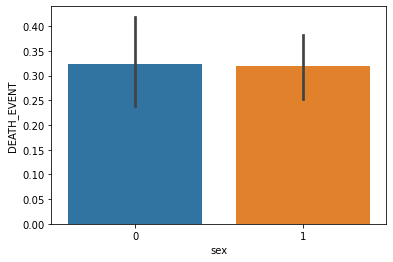

In [30]:
#SEX HAS two features
import seaborn as sns
y = data["DEATH_EVENT"]
sns.barplot(data["sex"],y)

"""From the dataset '0:Female' and '1:Male'"""

#### We notice female has more chances of getting heart attack than male

#### ANALYSING DIABETES and HD

"From the dataset we know '0 :No diabetes' and '1 :Have diabetes'"

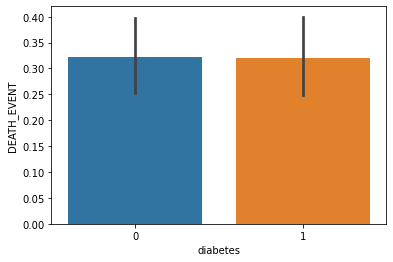

In [9]:

import seaborn as sns
y = data["DEATH_EVENT"]
sns.barplot(data["diabetes"],y)

"""From the dataset we know '0 :No diabetes' and '1 :Have diabetes'"""

#### People with diabetes has more chance of getting heart attack

#### ANALYSING HIGH_BLOODPRESSURE and HD

" From the dataset we know that '0:People who do not have HBP' and '1: People WHO HAVE HBP'"

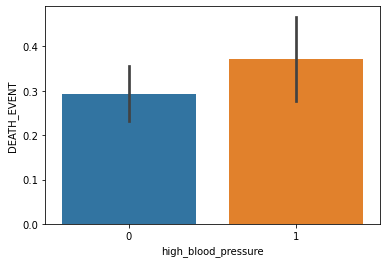

In [11]:
import seaborn as sns
y = data["DEATH_EVENT"]
sns.barplot(data["high_blood_pressure"],y)
""" From the dataset we know that '0:People who do not have HBP' and '1: People WHO HAVE HBP'"""

#### People with highbloodpressure have high risk of getting a heart failure

#### ANALYSING SMOKING and HD

" From the dataset we know that '0:People who do not SMOKE' and '1: People WHO SMOKE"

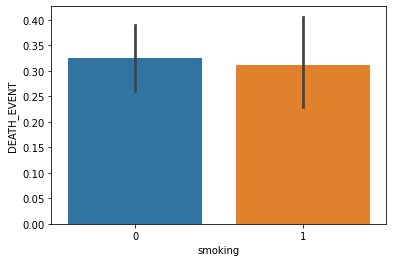

In [35]:
import seaborn as sns
y = data["DEATH_EVENT"]
sns.barplot(data["smoking"],y)

""" From the dataset we know that '0:People who do not SMOKE' and '1: People WHO SMOKE"""

#### Here we almost have same chance of getting heart attack

#### From the above plots the risk factors of HeartFailure are:
1. High BloodPressure
2. Diabetes

### CORRELATION HEAT MAP

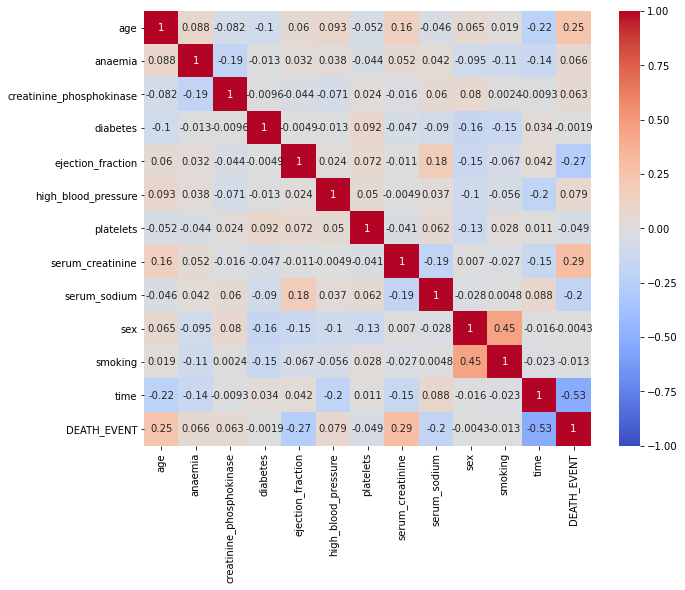

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm',annot = True)
plt.show()

#### Correlation ranges from -1 to +1 . Larger the number and darker the colour, the correlation is higher between variables
0 - no correlation;  
1 - positive correlation;  
-1 - negative correlation



### Algorithm Selection

Since the problem statement states we have to predict the death by heart failure,Supervised machine learning algorithm can be used.

The dataset have discrete value, so classisfication algorithm is choosed.

Out of Classification algorithms NaiveBayes is selected because it is simple and easy to understand,upto 100 times faster,stable to data changes


### Training and Test Split

In [83]:
from sklearn.model_selection import train_test_split
predictors = data.drop("DEATH_EVENT",axis=1)
target = data["DEATH_EVENT"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=0)

In [84]:
X_train.shape

(209, 12)

In [85]:
X_test.shape

(90, 12)

In [86]:
Y_train.shape

(209,)

In [87]:
Y_test.shape

(90,)

### MODEL GENERATION

#### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('heart_failure.csv')

#Feature selection 
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["DEATH_EVENT"]

#traning data = 70%
#Testing data = 30%
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=2)

accuracy_list = []

nb = GaussianNB()

#Fitting model
nb.fit(x_train, y_train)

#Model Prediction
nb_pred = nb.predict(x_test)


#### CONFUSION MATRIX

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nb_pred)

array([[62,  4],
       [ 9, 15]], dtype=int64)

True positive : 62
False Positive : 4
False Negative : 9
True Negative : 15  

#### Confusion matrix is used to assess the performance of a Classification model


#### True positive: 

#### True negative: 

#### False Positive(Type 1 ERROR): 

#### False Negative(Type 2 ERROR): 

##### Accuracy score

In [11]:
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_test, nb_pred)
accuracy_list.append(100*nb_acc)
print("Accuracy of NaiveBayes is : ", "{:.2f}%".format(100* nb_acc))

Accuracy of NaiveBayes is :  85.56%


##### Precision score

In [12]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, nb_pred, average=None)
print("Precision Score is", precision)

Precision Score is [0.87323944 0.78947368]


##### Recall score

In [109]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, nb
                      _pred, average=None)
print("Recall_score is ",recall)

Recall_score is  [0.93939394 0.625     ]


#### Since the Recall score is above 0.5,it is considered as good recall score for this model

##### F1 score

Measures model's accuracy on a dataset.What percent of positive prediction were correct

In [113]:
F1 = 2 * (precision * recall) / (precision + recall)
print("F1-score is",F1)


F1-score is [0.90510949 0.69767442]


For class 0: 0.905  ; 
For class 1: 0.697

In [105]:
Y_pred_nb.shape


(60,)

In [14]:
from sklearn import metrics
import numpy as np
nb_pred = nb.predict(x_test)
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.79      0.62      0.70        24

    accuracy                           0.86        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.85      0.86      0.85        90



Therefore, here we created a supervised machine learning  model to access the likelihood of death, due to heart failure with an accuracy of about 85.56% which is more than 70% .